In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statistics import mean , median , mode

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset_train = pd.read_csv('train.csv')
dataset_test  = pd.read_csv('test.csv')
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
len(dataset_train['Ticket'].unique()) , len(dataset_test['Ticket'].unique())

(681, 363)

In [5]:
len(dataset_train['Cabin'].unique()) , len(dataset_test['Cabin'].unique())

(148, 77)

In [6]:
len(dataset_train) , len(dataset_test)

(891, 418)

**Note:** <br>
We will simultaneously feature engineer test data.

### Cleaning Data

We will remove unnecessary columns from the dataset, which are:
- PassengerId
- Name
- Ticket

In [7]:
dataset_train.drop(['PassengerId', 'Name' ,'Ticket'],axis = 1 , inplace = True)
dataset_test.drop(['PassengerId', 'Name' ,'Ticket'],axis = 1 , inplace = True)

In [8]:
dataset_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
dataset_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [10]:
numerical_features = [feature for feature in dataset_train.columns if dataset_train[feature].dtypes != 'O']
numerical_features

#This is almost same for test data except for 'Survived' column which we will remove later on.

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [11]:
discrete_features = [feature for feature in numerical_features if len(dataset_train[feature].unique()) < 25]
discrete_features

['Survived', 'Pclass', 'SibSp', 'Parch']

In [12]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['Age', 'Fare']

In [13]:
categorical_features = [feature for feature in dataset_train.columns if dataset_train[feature].dtypes == 'O']
categorical_features

['Sex', 'Cabin', 'Embarked']

**Checking for wrong information in the observations.**

In [14]:
#For train data
dataset_train.loc[dataset_train['Fare']==0,:] , len(dataset_train.loc[dataset_train['Fare']==0,:])

(     Survived  Pclass   Sex   Age  SibSp  Parch  Fare Cabin Embarked
 179         0       3  male  36.0      0      0   0.0   NaN        S
 263         0       1  male  40.0      0      0   0.0   B94        S
 271         1       3  male  25.0      0      0   0.0   NaN        S
 277         0       2  male   NaN      0      0   0.0   NaN        S
 302         0       3  male  19.0      0      0   0.0   NaN        S
 413         0       2  male   NaN      0      0   0.0   NaN        S
 466         0       2  male   NaN      0      0   0.0   NaN        S
 481         0       2  male   NaN      0      0   0.0   NaN        S
 597         0       3  male  49.0      0      0   0.0   NaN        S
 633         0       1  male   NaN      0      0   0.0   NaN        S
 674         0       2  male   NaN      0      0   0.0   NaN        S
 732         0       2  male   NaN      0      0   0.0   NaN        S
 806         0       1  male  39.0      0      0   0.0   A36        S
 815         0      

In [15]:
#For test data
dataset_test.loc[dataset_test['Fare']==0,:] , len(dataset_test.loc[dataset_test['Fare']==0,:])

(     Pclass   Sex   Age  SibSp  Parch  Fare        Cabin Embarked
 266       1  male   NaN      0      0   0.0          NaN        S
 372       1  male  49.0      0      0   0.0  B52 B54 B56        S, 2)

There are 15 rows having Fare amount equal to 0 , which is incorrect. So we will impute the Fare amount with mean.

In [16]:
mean(dataset_train.Fare) , np.mean(dataset_test['Fare'])

(32.204207968574636, 35.6271884892086)

In [17]:
#For train set
#Replace 0 with nan in Fare column
dataset_train.loc[dataset_train['Fare']==0 , 'Fare'] = None

#Later on we will impute these missing values

In [18]:
#For test set
#Replace 0 with nan in Fare column
dataset_test.loc[dataset_test['Fare']==0 , 'Fare'] = None

#Later on we will impute these missing values

In [19]:
dataset_train['Fare'].isna().sum()

15

In [20]:
dataset_test['Fare'].isna().sum()

3

### Handling Missing Values - of Numeric Variables

In [21]:
dataset_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare         15
Cabin       687
Embarked      2
dtype: int64

In [22]:
dataset_test.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          3
Cabin       327
Embarked      0
dtype: int64

**For Train Dataset and Test Dataset the numerical na variables are same.**

In [23]:
features_with_na = [feature for feature in dataset_train.columns if dataset_train[feature].isna().sum() > 1]
dataset_train[features_with_na].head()

,Age,Fare,Cabin,Embarked
0,22.0,7.2500,NaN,S
1,38.0,71.2833,C85,C
2,26.0,7.9250,NaN,S
3,35.0,53.1000,C123,S
4,35.0,8.0500,NaN,S


In [24]:
dataset_test[features_with_na].head()

,Age,Fare,Cabin,Embarked
0,34.5,7.8292,NaN,Q
1,47.0,7.0000,NaN,S
2,62.0,9.6875,NaN,Q
3,27.0,8.6625,NaN,S
4,22.0,12.2875,NaN,S


In [25]:
np.mean(dataset_train['Age'])

29.69911764705882

In [26]:
#dataset['Age'].hist(bins = 25)

**For Train Dataset**

In [27]:
#Lets create a new variable which will contain 1 for every missing value in Age
dataset_train['Age_na'] = np.where(dataset_train['Age'].isnull() , 1 , 0)
dataset_train['Fare_na'] = np.where(dataset_train['Fare'].isnull() , 1 , 0)

#Imputing missing values with mean
dataset_train['Age'].fillna(dataset_train['Age'].mean() , inplace = True)
dataset_train['Fare'].fillna(dataset_train['Fare'].mean() , inplace = True)

**For Test Dataset**

In [28]:
#Lets create a new variable which will contain 1 for every missing value in Age
dataset_test['Age_na'] = np.where(dataset_test['Age'].isnull() , 1 , 0)
dataset_test['Fare_na'] = np.where(dataset_test['Fare'].isnull() , 1 , 0)

#Imputing missing values with mean
dataset_test['Age'].fillna(dataset_test['Age'].mean() , inplace = True)
dataset_test['Fare'].fillna(dataset_test['Fare'].mean() , inplace = True)

### Handling Missing Values - of Categorical Variables

**For Train & Test Dataset**

In [29]:
#Replace missing values with new label

for feature in categorical_features:
    if(dataset_train[feature].isna().sum()>1):
        dataset_train[feature].fillna('Missing' , inplace = True)
#dataset_train.head()

#Replace missing values with new label

for feature in categorical_features:
    if(dataset_test[feature].isna().sum()>1):
        dataset_test[feature].fillna('Missing' , inplace = True)
#dataset_test.head()

In [30]:
dataset_train[features_with_na].head()

,Age,Fare,Cabin,Embarked
0,22.0,7.2500,Missing,S
1,38.0,71.2833,C85,C
2,26.0,7.9250,Missing,S
3,35.0,53.1000,C123,S
4,35.0,8.0500,Missing,S


In [31]:
dataset_test[features_with_na].head()

,Age,Fare,Cabin,Embarked
0,34.5,7.8292,Missing,Q
1,47.0,7.0000,Missing,S
2,62.0,9.6875,Missing,Q
3,27.0,8.6625,Missing,S
4,22.0,12.2875,Missing,S


In [32]:
dataset_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Age_na      0
Fare_na     0
dtype: int64

In [33]:
dataset_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Age_na      0
Fare_na     0
dtype: int64

### Distribution of Numerical Values (Continuous)

From the previous section we found out that the continuous variables are Fare and Age. So let's see their distribution

**For Train Dataset**

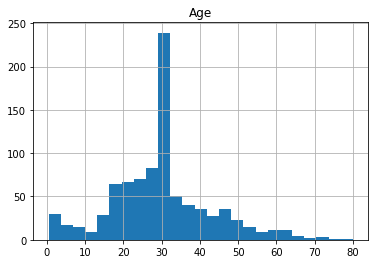

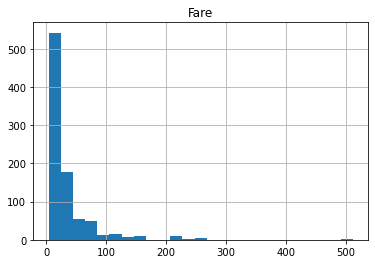

In [34]:
for feature in continuous_features:
    dataset_train[feature].hist(bins = 25)
    plt.title(feature)
    plt.show()

**For Test Dataset**

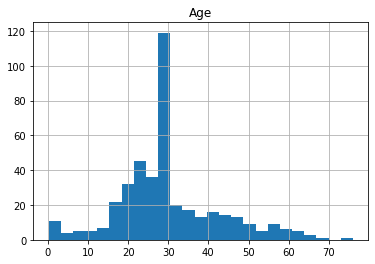

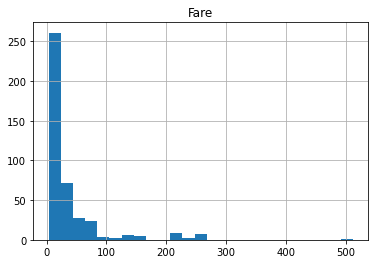

In [35]:
for feature in continuous_features:
    dataset_test[feature].hist(bins = 25)
    plt.title(feature)
    plt.show()

Fare is positively skewed , so we will apply normal log transformation to it.

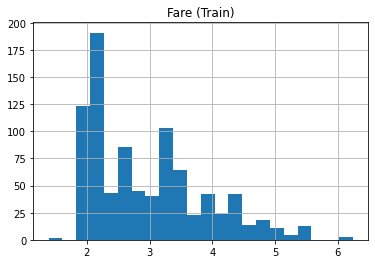

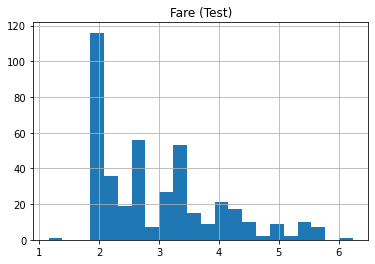

In [36]:
#For Train set
dataset_train[feature] = np.log(dataset_train[feature])
dataset_train[feature].hist(bins = 22)
plt.title(feature+" (Train)")
plt.show()

#For Test Set
dataset_test[feature] = np.log(dataset_test[feature])
dataset_test[feature].hist(bins = 22)
plt.title(feature+" (Test)")
plt.show()

### Encoding Categorical Features

In [37]:
categorical_features

['Sex', 'Cabin', 'Embarked']

In [38]:
len(dataset_train['Sex'].unique()) , len(dataset_test['Sex'].unique())

(2, 2)

In [39]:
len(dataset_train['Cabin'].unique()) , len(dataset_test['Cabin'].unique())

(148, 77)

In [40]:
len(dataset_train['Embarked'].unique()) , len(dataset_test['Embarked'].unique())

(4, 3)

In [41]:
dataset_train['Embarked'].unique()

array(['S', 'C', 'Q', 'Missing'], dtype=object)

In [42]:
dataset_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

Since number of unique values of Cabin and Embarked is different in train and test dataset , we can't use one hot encoder for them. 
So, first we will use label encoder for these two variables and then one hot encoder for Sex variable.

**Using Label Encoder for Cabin and Embarked Columns**

In [43]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [44]:
#For TRAIN DATASET
# apply le on categorical feature columns
dataset_train['Cabin'] = le.fit_transform(dataset_train['Cabin'])
#data[categorical_features].head(10)

#For TEST DATASET
# apply le on categorical feature columns
dataset_test['Cabin'] = le.fit_transform(dataset_test['Cabin'])
#data[categorical_features].head(10)

In [45]:
dataset_test[categorical_features].head()

,Sex,Cabin,Embarked
0,male,76,Q
1,female,76,S
2,male,76,Q
3,male,76,S
4,female,76,S


In [46]:
dataset_train[categorical_features].head()

,Sex,Cabin,Embarked
0,male,146,S
1,female,81,C
2,female,146,S
3,female,55,S
4,male,146,S


**Using One Hot Encoding using pandas get_dummy()**

In [47]:

dataset_train = pd.get_dummies(dataset_train)
dataset_test = pd.get_dummies(dataset_test)
dataset_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_na,Fare_na,Sex_female,Sex_male,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1.981001,146,0,0,0,1,0,0,0,1
1,1,1,38.0,1,0,4.266662,81,0,0,1,0,1,0,0,0
2,1,3,26.0,0,0,2.070022,146,0,0,1,0,0,0,0,1
3,1,1,35.0,1,0,3.972177,55,0,0,1,0,0,0,0,1
4,0,3,35.0,0,0,2.085672,146,0,0,0,1,0,0,0,1


In [48]:
#adding Embarked_Missing with all values 0 in test dataset , since this column is missing
dataset_test['Embarked_Missing'] = 0

In [49]:
dataset_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_na,Fare_na,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Missing
0,3,34.5,0,0,2.057860,76,0,0,0,1,0,1,0,0
1,3,47.0,1,0,1.945910,76,0,0,1,0,0,0,1,0
2,2,62.0,0,0,2.270836,76,0,0,0,1,0,1,0,0
3,3,27.0,0,0,2.159003,76,0,0,0,1,0,0,1,0
4,3,22.0,1,1,2.508582,76,0,0,1,0,0,0,1,0


### Feature Scaling

In [52]:
feature_scale = [feature for feature in dataset_train.columns if feature != 'Survived']
feature_scale , len(feature_scale)

(['Pclass',
  'Age',
  'SibSp',
  'Parch',
  'Fare',
  'Cabin',
  'Age_na',
  'Fare_na',
  'Sex_female',
  'Sex_male',
  'Embarked_C',
  'Embarked_Missing',
  'Embarked_Q',
  'Embarked_S'],
 14)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset_train[feature_scale])
scaler.fit(dataset_test[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
#transform the data and add on the ID and SalePrice variables
dataset_train = pd.concat([dataset_train[['Survived']].reset_index(drop = True),
                 pd.DataFrame(scaler.transform(dataset_train[feature_scale]) , columns = feature_scale)], axis =1)

In [55]:
dataset_test = pd.DataFrame(scaler.transform(dataset_test[feature_scale]), columns = feature_scale)

In [56]:
dataset_train.shape , dataset_test.shape

((891, 15), (418, 14))

In [57]:
dataset_train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_na,Fare_na,Sex_female,Sex_male,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,0,1.0,0.287881,0.125,0.000000,0.162639,1.921053,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0.0,0.498879,0.125,0.000000,0.612131,1.065789,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,1.0,0.340630,0.000,0.000000,0.180146,1.921053,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,0.0,0.459317,0.125,0.000000,0.554219,0.723684,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1.0,0.459317,0.000,0.000000,0.183223,1.921053,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0,1.0,0.389412,0.000,0.000000,0.192953,1.921053,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0,0.0,0.709877,0.000,0.000000,0.549581,1.697368,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0,1.0,0.024133,0.375,0.111111,0.372490,1.921053,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,1,1.0,0.353818,0.000,0.222222,0.246993,1.921053,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,1,0.5,0.182382,0.125,0.000000,0.442395,1.921053,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [58]:
dataset_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Age_na,Fare_na,Sex_female,Sex_male,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.177754,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.155738,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.219637,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.197645,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.266392,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.182382,0.000,0.000000,0.210017,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,1.0,0.393380,0.000,0.000000,0.172665,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.5,0.340630,0.125,0.111111,0.435264,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,1.0,0.235131,0.000,0.000000,0.162074,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.274693,0.250,0.000000,0.399274,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [59]:
dataset_test.to_csv('processed_test.csv',index = False)
dataset_train.to_csv('processed_train.csv', index = False)